# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [4]:
import os
import pandas as pd
import numpy as np
import re
PUIdata = os.getenv('PUIDATA')

In [5]:
# Load dataset

data_311 = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. 

In [6]:
# Check if all Boroughs and Community Districts are represented in the Data 
data_311.count()

Unique Key                        10187766
Created Date                      10187766
Closed Date                        9736887
Agency                            10187766
Agency Name                       10187766
Complaint Type                    10187766
Descriptor                        10156709
Location Type                      7120170
Incident Zip                       9393607
Incident Address                   7990060
Street Name                        7989207
Cross Street 1                     7811823
Cross Street 2                     7761973
Intersection Street 1              1842478
Intersection Street 2              1841464
Address Type                       9697467
City                               9399054
Landmark                              7310
Facility Type                      1608281
Status                            10187766
Due Date                           3067480
Resolution Description             6401015
Resolution Action Updated Date     9936832
Community B

In [16]:
data_anl = data_311

In [17]:
# How many unique values do we have
print (len(data_anl['Community Board'].unique()))

77


In [18]:
data_anl.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries.  We should have 59 Community Districts.
there are some labeled as unspecified.

##### Check for duplicates? Are these plausible?

In [19]:
data_uni = data_anl.drop_duplicates()
print ('Number of all duplicates: {}'.format(len(data_anl) - len(data_uni)))

Number of all duplicates: 0


#### Check for duplicates? Are these plausible?

There are no duplicates in the file by using pandas' function but there some duplicate unique keys are not be detacted.

#### What about missing values? Can you detect any patterns? 

In [22]:
data_uni.isnull().sum()

Unique Key                               0
Created Date                             0
Closed Date                         450879
Agency                                   0
Agency Name                              0
Complaint Type                           0
Descriptor                           31057
Location Type                      3067596
Incident Zip                        794159
Incident Address                   2197706
Street Name                        2198559
Cross Street 1                     2375943
Cross Street 2                     2425793
Intersection Street 1              8345288
Intersection Street 2              8346302
Address Type                        490299
City                                788712
Landmark                          10180456
Facility Type                      8579485
Status                                   0
Due Date                           7120286
Resolution Description             3786751
Resolution Action Updated Date      250934
Community B

#### Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
#### to fill missings in Resolution Descriptor?

It definitely have methods to fill the missing value. However, it
is not a right way to use one attribute to fill another, but you can us their relation to fill missing value

In [ ]:
# Generate marker for unplausible Community Districts
# How do these districts look like? 

In [43]:
data_uni['Bad Community Board'] = data_uni['Community Board'].str.contains("Unspecified")

In [44]:
data_uni[['Community Board','Bad Community Board']].head()

,Community Board,Bad Community Board
0,13 BROOKLYN,False
1,0 Unspecified,True
2,18 BROOKLYN,False
3,12 BROOKLYN,False
4,0 Unspecified,True


In [45]:
# Drop the marked districts

In [46]:
data_good = data_uni[data_uni['Bad Community Board'] == False]
data_good.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Bad Community Board
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)",False
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)",False
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)",False
5,31914148,11/05/2015 01:55:55 AM,NaN,DOT,Department of Transportation,Highway Condition,Pothole - Highway,Highway,10304,NaN,...,East/Brooklyn Bound,Roadway,Clove Rd/Richmond Rd (Exit 13) - Lily Pond Ave...,NaN,NaN,NaN,40.606875,-74.085408,"(40.60687536641399, -74.0854077221027)",False
7,31912611,11/05/2015 01:47:12 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10021,1402 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.769379,-73.957930,"(40.769378795761845, -73.95793023233308)",False


In [47]:
len(data_good['Community Board'].unique())

71

In [64]:
data_good['Bad Community Board'] = data_good['Community Board'].str.extract('(\d+)').astype(int) >20

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [65]:
data_gg = data_good[data_good['Bad Community Board'] == False]
len(data_gg['Community Board'].unique())

59

#### Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
#### on the Community district level

In [83]:
data_ = data_gg[["Community Board","Complaint Type"]]
comm_complaints = data_.groupby('Community Board').count()
comm_complaints.columns = ['Number of Complaints']

In [84]:
community_complaints

,Number of Complaints
Community Board,
01 BRONX,74631
01 BROOKLYN,185057
01 MANHATTAN,77974
01 QUEENS,171484
01 STATEN ISLAND,182713
02 BRONX,60257
02 BROOKLYN,121022
02 MANHATTAN,133860
02 QUEENS,114333


In [ ]:
# Safe reduced data frame (Community District level)

# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [71]:
# Population by Community District
df_pop = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data//Final_Demographics.csv")
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [ ]:
# Check variables in file

In [72]:
df_pop.columns

Index(['FIPS', 'cd_id', 'Total Population',
       'Population Density (per sq. mile)', '% Total Population: Male',
       '% Total Population: 18 to 24 Years',
       '% Total Population: 25 to 34 Years',
       '% Total Population: 35 to 44 Years',
       '% Population 5 Years And Over: Speak Only English',
       '% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       '% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       '% Employed Civilian Population 16 Years And Over: Service occupations',
       '% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       '% Employed Civ

In [ ]:
# How many community districts are in file? 

In [73]:
len(df_pop['cd_id'].unique())

59

In [ ]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311

In [74]:
# % Total Population: 18 to 24 Years

comm_demo = df_pop[['cd_id', '% Total Population: 18 to 24 Years']]
comm_demo.columns = ['cd_id', 'young']
comm_demo.head()



,cd_id,young
0,BX08,10.73
1,BX12,11.35
2,BX10,8.62
3,BX11,8.10
4,BX03,14.24


In [ ]:
# Save data frame

In [75]:
# Infrastructure by Community District
df_infr = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data//ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [76]:
# Check variables in file
df_infr.columns

Index(['FIPS', 'Geographic Identifier', 'Qualifying Name', 'Households',
       'Households: With An Internet Subscription',
       'Households: Dial-Up Alone', 'Households: Dsl',
       'Households: With Mobile Broadband',
       'Households: Without Mobile Broadband', 'Households: Cable Modem',
       'Households: With Mobile Broadband.1',
       'Households: Without Mobile Broadband.1', 'Households: Fiber-Optic',
       'Households: With Mobile Broadband.2',
       'Households: Without Mobile Broadband.2',
       'Households: Satellite Internet Service',
       'Households: With Mobile Broadband.3',
       'Households: Without Mobile Broadband.3',
       'Households: Two or More Fixed Broadband Types, or Other',
       'Households: With Mobile Broadband.4',
       'Households: Without Mobile Broadband.4',
       'Households: Mobile Broadband Alone or With Dialup',
       'Households: Internet Access Without A Subscription',
       'Households: No Internet Access',
       '% Househol

In [77]:
# How many community districts are in file? 
len(df_infr['Qualifying Name'].unique())

55

In [ ]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data

In [81]:
comm_internet = df_infr[['Qualifying Name', 'Households: With Dial-Up Internet Subscription Alone', 
                              'Households: With A Broadband Internet Subscription']]
comm_internet.columns = ['Community Name', 'low_internet_conection', 'high_internet_connection']
comm_internet['with_internet'] = comm_internet['low_internet_conection'] + comm_internet['high_internet_connection']
comm_internet.drop(['low_internet_conection', 'high_internet_connection'], axis=1, inplace=True)
comm_internet.head(10)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Community Name,with_internet
0,"NYC-Bronx Community District 8--Riverdale, New...",31347
1,"NYC-Bronx Community District 12--Wakefield, Ne...",31613
2,"NYC-Bronx Community District 10--Co-op City, N...",32491
3,NYC-Bronx Community District 11--Pelham Parkwa...,31400
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",33496
5,"NYC-Bronx Community District 3 & 6--Belmont, N...",33496
6,"NYC-Bronx Community District 7--Bedford Park, ...",31021
7,NYC-Bronx Community District 5--Morris Heights...,25826
8,"NYC-Bronx Community District 4--Concourse, New...",28287
9,"NYC-Bronx Community District 9--Castle Hill, N...",45441


In [ ]:
# Aggregate internet type by high and low connections

In [ ]:
# Save data frame 

# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [ ]:
# Harmonize identifier of dataframe 1

In [90]:
comm_complaints = comm_complaints.reset_index()

In [91]:
comm_complaints["Community Board"].unique()

array(['01 BRONX', '01 BROOKLYN', '01 MANHATTAN', '01 QUEENS',
       '01 STATEN ISLAND', '02 BRONX', '02 BROOKLYN', '02 MANHATTAN',
       '02 QUEENS', '02 STATEN ISLAND', '03 BRONX', '03 BROOKLYN',
       '03 MANHATTAN', '03 QUEENS', '03 STATEN ISLAND', '04 BRONX',
       '04 BROOKLYN', '04 MANHATTAN', '04 QUEENS', '05 BRONX',
       '05 BROOKLYN', '05 MANHATTAN', '05 QUEENS', '06 BRONX',
       '06 BROOKLYN', '06 MANHATTAN', '06 QUEENS', '07 BRONX',
       '07 BROOKLYN', '07 MANHATTAN', '07 QUEENS', '08 BRONX',
       '08 BROOKLYN', '08 MANHATTAN', '08 QUEENS', '09 BRONX',
       '09 BROOKLYN', '09 MANHATTAN', '09 QUEENS', '10 BRONX',
       '10 BROOKLYN', '10 MANHATTAN', '10 QUEENS', '11 BRONX',
       '11 BROOKLYN', '11 MANHATTAN', '11 QUEENS', '12 BRONX',
       '12 BROOKLYN', '12 MANHATTAN', '12 QUEENS', '13 BROOKLYN',
       '13 QUEENS', '14 BROOKLYN', '14 QUEENS', '15 BROOKLYN',
       '16 BROOKLYN', '17 BROOKLYN', '18 BROOKLYN'], dtype=object)

In [97]:
cd_id = {'BRONX': 'BX', 'BROOKLYN': 
         'BK', 'MANHATTAN': 'MN', 'QUEENS': 'QN', 'STATEN ISLAND': 'SI'}


comm_complaints['cd_num'] = comm_complaints['Community Board'].str[:2]
comm_complaints['cd_bor'] = comm_complaints['Community Board'].str[3:]


comm_complaints.replace({'cd_bor': cd_id}, inplace=True)
comm_complaints['cd_id'] = comm_complaints.cd_bor + comm_complaints.cd_num
comm_complaints_update = comm_complaints[["cd_id", "Number of Complaints"]]

comm_complaints_update.head()

,cd_id,Number of Complaints
0,BX01,74631
1,BK01,185057
2,MN01,77974
3,QN01,171484
4,SI01,182713


In [98]:
# Harmonize identifier of dataframe 2

comm_demo['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [100]:
comm_demo.replace('MN11111', 'MN11', inplace=True)
comm_demo['cd_id'].unique()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [ ]:
# Harmonize identifier of dataframe 3

In [107]:
cd_id1 = {'Bronx': 'BX', 'Brooklyn': 'BK', 'Manhattan': 'MN', 'Queens': 'QN', 'Staten': 'SI'}

comm_internet['cd_bor'] = comm_internet['Community Name'].str.extract('(?<=^....)([a-zA-Z]+)',
                                                                      expand=True)
comm_internet['cd_num'] = comm_internet['Community Name'].str.extract('([0-9]+)',
                                                                                expand=True)

comm_internet['cd_num'] = comm_internet['cd_num'].apply(lambda x: '{0:0>2}'.format(x))
comm_internet.replace({'cd_bor': cd_id1}, inplace=True)
comm_internet['cd_id'] = comm_internet.cd_bor + comm_internet.cd_num


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [110]:
comm_internet.drop(['Community Name', 'cd_num', 'cd_boro'], axis=1, inplace=True)
comm_internet.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,with_internet,cd_bor,cd_id
0,31347,BX,BX08
1,31613,BX,BX12
2,32491,BX,BX10
3,31400,BX,BX11
4,33496,BX,BX03


In [ ]:
# Link the 3 dataframes

In [111]:
data_cd = pd.merge(comm_demo, comm_complaints, on='cd_id', how='left')
data_cd.head()

,cd_id,young,Community Board,Number of Complaints,cd_num,cd_boro,cd_bor
0,BX08,10.73,08 BRONX,92733,08,BX,BX
1,BX12,11.35,12 BRONX,168455,12,BX,BX
2,BX10,8.62,10 BRONX,95496,10,BX,BX
3,BX11,8.10,11 BRONX,122081,11,BX,BX
4,BX03,14.24,03 BRONX,75134,03,BX,BX


In [126]:
all_ = pd.merge(data_cd, comm_internet, on='cd_id', how='left')
all_.head()

,cd_id,young,Community Board,Number of Complaints,cd_num,cd_boro,cd_bor_x,with_internet,cd_bor_y
0,BX08,10.73,08 BRONX,92733,08,BX,BX,31347.0,BX
1,BX12,11.35,12 BRONX,168455,12,BX,BX,31613.0,BX
2,BX10,8.62,10 BRONX,95496,10,BX,BX,32491.0,BX
3,BX11,8.10,11 BRONX,122081,11,BX,BX,31400.0,BX
4,BX03,14.24,03 BRONX,75134,03,BX,BX,33496.0,BX


In [127]:
all_.drop([ 'cd_num', "cd_bor_x","cd_bor_y"], axis=1, inplace=True)


In [128]:
all_.head()

,cd_id,young,Community Board,Number of Complaints,cd_boro,with_internet
0,BX08,10.73,08 BRONX,92733,BX,31347.0
1,BX12,11.35,12 BRONX,168455,BX,31613.0
2,BX10,8.62,10 BRONX,95496,BX,32491.0
3,BX11,8.10,11 BRONX,122081,BX,31400.0
4,BX03,14.24,03 BRONX,75134,BX,33496.0


In [116]:
# Are the demographics and infrastructure different in Community Districts that show more complaints than others?

In [131]:
a = all_.groupby("cd_boro").sum()

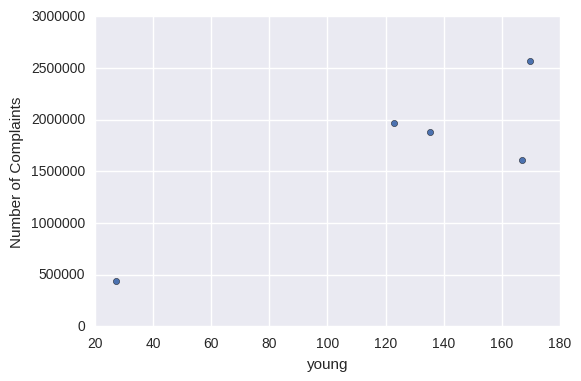

In [135]:
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf
%matplotlib inline
a.plot(x="young", y="Number of Complaints",kind="scatter")

Figure 1. scatter plot for number of complaints and young population

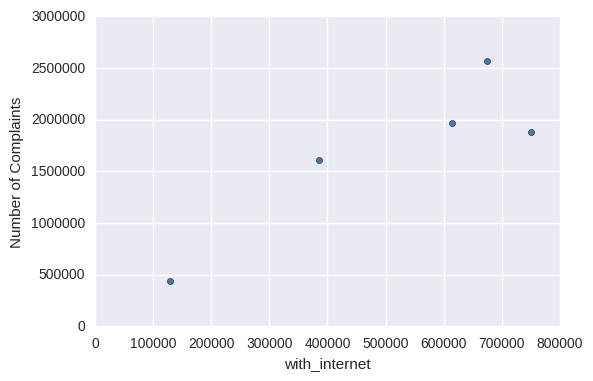

In [136]:
a.plot(x="with_internet", y="Number of Complaints",kind="scatter")

Figure 2. Number of Complaints and people has internet

In [140]:
a.corr()

,young,Number of Complaints,with_internet
young,1.000000,0.880097,0.709975
Number of Complaints,0.880097,1.000000,0.887874
with_internet,0.709975,0.887874,1.000000


As shown in Figure 1. and Figure 2., Number of Complaints somehow has relationship with  young population and people with internet.
However, it is not a linear relationship. 